<img src="https://filoger.com/wp-content/uploads/2021/09/circle-logo-1536x1536.png" alt="keras" width="150" height="150">
<h1 align=center><font size = 7>Lab 09 :
    <br><br>Logistic Regression & KNN & SVM</font></h1>
<h1 align=center><font size = 4>Filoger Summer School, 1401 | DeadLine: 12th Mordad, 23:00 </font></h1>



## Question Sheet!

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3>

<b>Download the Question sheet from the following link!</b>
-   <a href="https://new.edmodo.com/groups/filoger-summer-school-38664125">Lab 09: Question sheet: Logistic Regression & KNN & SVM</a>
</font>
</div>


# 🚢🛳 Titanic Prediction 🛳🚢

# PART 00

# Step1: Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step2: Read Datasets

In [4]:
df=pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Step3: Check out the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.corr()['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

# Step4: Data preparation 
<hr>
<h2>Dealing with Missing Data

In [7]:
def MissingPercent(df):
    nanPercent=100*(df.isnull().sum()/len(df))
    nanPercent=nanPercent[nanPercent>0].sort_values()
    return nanPercent

In [8]:
MissingPercent(df)

Embarked     0.224467
Age         19.865320
Cabin       77.104377
dtype: float64

In [9]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [10]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [11]:
MissingPercent(df)

Embarked     0.224467
Cabin       77.104377
dtype: float64

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [14]:
df['Embarked']=df['Embarked'].fillna('S')

In [15]:
MissingPercent(df)

Cabin    77.104377
dtype: float64

In [16]:
df['Cabin'].isnull().sum()

687

In [17]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [18]:
df['Cabin']=df['Cabin'].fillna('None')

In [19]:
MissingPercent(df)

Series([], dtype: float64)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Hint: Now, we don't have any Missing Data.

## 🟣Creating Dummy Variables

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,None,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,None,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [22]:
cols=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
Xs=df[cols]
Ys=df['Survived']
Xs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [23]:
XsHot=pd.get_dummies(Xs)
XsHot

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


In [24]:
Ys=df['Survived']
Ys

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Step5: Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XsHot, Ys, test_size=0.2, random_state=101)

# Step6: Scaling Data

In [26]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
X_trainScaled=scaler.transform(X_train)
X_testScaled=scaler.transform(X_test)

# PART 01

# Step7: Build the model ---> Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
modelLog=LogisticRegression()
modelLog.fit(X_trainScaled,y_train)

LogisticRegression()

In [28]:
modelLog.coef_

array([[-0.87736803, -0.48165799, -0.34646731, -0.07195894,  0.11068626,
         0.62693074, -0.62693074,  0.08313656,  0.01162231, -0.08015774]])

# Step8: Predict

In [29]:
yPredLog=modelLog.predict(X_testScaled)
yPredLog

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0], dtype=int64)

# Step9: Evaluate model

## 🟣 Confusion Matrix

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix,precision_score,recall_score,f1_score

In [31]:
confusion_matrix(y_test,yPredLog)

array([[88, 11],
       [22, 58]], dtype=int64)

### Classification Report

In [32]:
print(classification_report(y_test, yPredLog))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.84      0.72      0.78        80

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.81       179



### Plot Confusion Matrix

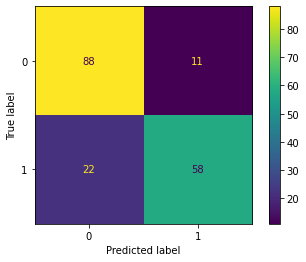

In [33]:
plot_confusion_matrix(modelLog, X_testScaled, y_test);

## 🟣 Accuracy Score

In [34]:
accLog=accuracy_score(y_test, yPredLog)
accLog

0.8156424581005587

## 🟣 Precision Score

In [35]:
precisionLog=precision_score(y_test,yPredLog)
precisionLog

0.8405797101449275

## 🟣 Recall score

In [36]:
recalLog=recall_score(y_test,yPredLog)
recalLog

0.725

## 🟣 F1-score

In [37]:
f1Log=f1_score(y_test,yPredLog)
f1Log

0.778523489932886

## 🟣 Curves & AUC

### Plot Precision Recall Curve

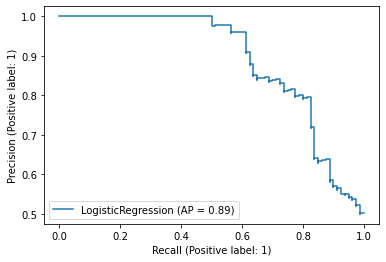

In [38]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
plot_precision_recall_curve(modelLog, X_testScaled, y_test);

### Plot Roc Curve

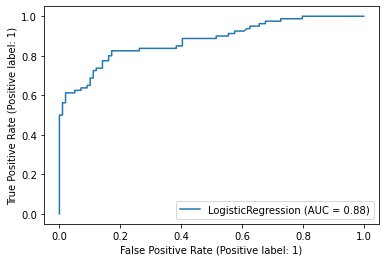

In [39]:
plot_roc_curve(modelLog, X_testScaled, y_test);

# Step10: Create DataFrame From Accuracy & Precision & Recall & F1-score

In [40]:
dfMetricsLog=pd.DataFrame([accLog, precisionLog, recalLog,f1Log], index=['Accuracy', 'Precision', 'Recall','F1-score'], columns=['Logestic Metrics'])
dfMetricsLog

,Logestic Metrics
Accuracy,0.815642
Precision,0.840580
Recall,0.725000
F1-score,0.778523


# PART 02

# Step11: Build the model ---> KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

modelKnn=KNeighborsClassifier(n_neighbors=1)
modelKnn.fit(X_trainScaled,y_train)

KNeighborsClassifier(n_neighbors=1)

# Step12: Predict

In [42]:
yPredKnn=modelKnn.predict(X_testScaled)
pd.DataFrame({'Y_Test':y_test, 'Y_Pred': yPredKnn})

,Y_Test,Y_Pred
331,0,1
700,1,1
748,0,0
751,1,1
481,0,0
...,...,...
154,0,0
454,0,0
879,1,1
771,0,0


# Step13: Evaluate model

## 🟣 Confusion Matrix

In [43]:
confusion_matrix(y_test,yPredKnn)

array([[81, 18],
       [19, 61]], dtype=int64)

### Classification Report

In [44]:
classReportKnn=classification_report(y_test,yPredKnn)
print(classReportKnn)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.77      0.76      0.77        80

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



### Plot Confusion Matrix

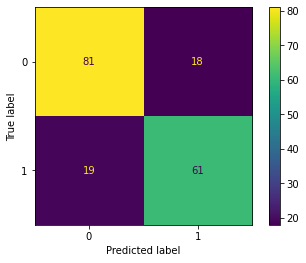

In [45]:
plot_confusion_matrix(modelKnn,X_testScaled,y_test)

## 🟣 Accuracy Score

In [46]:
accKnn=accuracy_score(y_test,yPredKnn)
accKnn

0.7932960893854749

## 🟣 Precision Score

In [47]:
precisionKnn=precision_score(y_test,yPredKnn)
precisionKnn

0.7721518987341772

## 🟣 Recall score

In [48]:
recalKnn=recall_score(y_test,yPredKnn)
recalKnn

0.7625

## 🟣 F1-score

In [49]:
f1Knn=f1_score(y_test,yPredKnn)
f1Knn

0.7672955974842767

# Step14: Elbow Method for Choosing Reasonable K Values

In [50]:
test_error_rate= []


for k in range (1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_trainScaled, y_train)
    
    y_pred_test = knn_model.predict(X_testScaled)
    
    test_error=1- accuracy_score(y_test, y_pred_test)
    test_error_rate.append(test_error)

test_error_rate

[0.2067039106145251,
 0.2178770949720671,
 0.17318435754189943,
 0.17318435754189943,
 0.17877094972067042,
 0.1899441340782123,
 0.2011173184357542,
 0.1955307262569832,
 0.1955307262569832,
 0.1955307262569832,
 0.2178770949720671,
 0.1955307262569832,
 0.1843575418994413,
 0.2011173184357542,
 0.1899441340782123,
 0.1955307262569832,
 0.1899441340782123,
 0.1955307262569832,
 0.1899441340782123,
 0.1955307262569832,
 0.1843575418994413,
 0.1899441340782123,
 0.1899441340782123,
 0.1955307262569832,
 0.1899441340782123,
 0.2011173184357542,
 0.1955307262569832,
 0.2011173184357542,
 0.2011173184357542]

In [51]:
testAccScoreList= []

for i in range (1, 30):
    modelKnnF=KNeighborsClassifier(n_neighbors=i)
    modelKnnF.fit(X_trainScaled,y_train)
    yPredKnnF=modelKnn.predict(X_testScaled)
    test_error=1- accuracy_score(y_test, yPredKnnF)
    testAccScoreList.append(test_error)



In [52]:
testAccScoreList

[0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251]

### Plot

Text(0.5, 0, 'K Value')

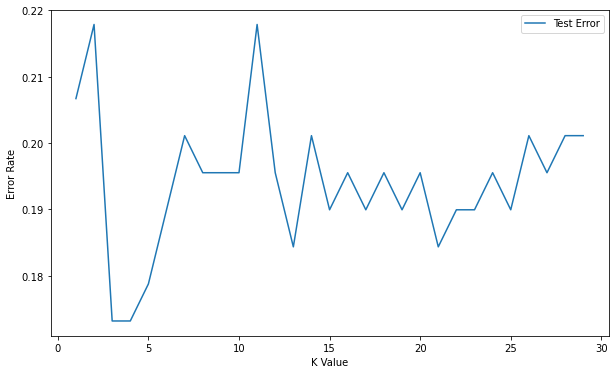

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), test_error_rate, label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')

# Step15: Creating a Pipeline to find best K value

In [54]:
scalerPip=StandardScaler()
modelPip=KNeighborsClassifier()
modelKnn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [55]:
operations= [('scaler', scalerPip), ('knn', modelPip)]
from sklearn.pipeline import Pipeline
pipe=Pipeline(operations)

In [56]:
from sklearn.model_selection import GridSearchCV
k_values= list(range(1, 20))
param_grid= {'knn__n_neighbors': k_values}
modelKnnGrid=GridSearchCV(pipe,param_grid=param_grid,cv=5,scoring='accuracy')
modelKnnGrid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [57]:
modelKnnGrid.best_estimator_.get_params,modelKnnGrid.cv_results_.keys()

(<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                 ('knn', KNeighborsClassifier(n_neighbors=16))])>,
 dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']))

# Step16: Final Model

## 🟣 Fit model with the best K value

In [58]:
scalerPipKnn16= StandardScaler()
knn16= KNeighborsClassifier(n_neighbors=16)
operations= [('scaler', scalerPipKnn16), ('knn16', knn16)]
pipe= Pipeline(operations)
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn16', KNeighborsClassifier(n_neighbors=16))])

## 🟣 Predict

In [59]:
yPredKnn16=pipe.predict(X_test)
yPredKnn16

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

## 🟣 Evaluating the Model

### Confusion Matrix

In [60]:
print(confusion_matrix(y_test,yPredKnn16))

[[93  6]
 [29 51]]


#### Classification Report

In [61]:
print(classification_report(y_test,yPredKnn16))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        99
           1       0.89      0.64      0.74        80

    accuracy                           0.80       179
   macro avg       0.83      0.79      0.79       179
weighted avg       0.82      0.80      0.80       179



#### Plot Confusion Matrix

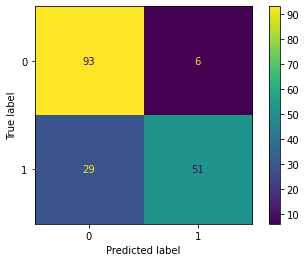

In [62]:
plot_confusion_matrix(pipe,X_test,y_test)

### Acuracy

In [63]:
accKnn16=accuracy_score(y_test,yPredKnn16)
accKnn16

0.8044692737430168

### Precision Score

In [64]:
precisionKnn16=precision_score(y_test,yPredKnn16)
precisionKnn16

0.8947368421052632

### Recall score

In [65]:
recalKnn16=recall_score(y_test,yPredKnn16)
recalKnn16

0.6375

### F1-score

In [66]:
f1Knn16=f1_score(y_test,yPredKnn16)
f1_score

<function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

### Predict with a sample

In [67]:
testData=[[2,'male',31,0,1,9,'Q'],
[1,'femele',44,1,0,16,'S'],
[1,'male',25,2,0,99,'S'],
[3,'male',10,1,2,50,'C'],
[3,'femele',50,0,2,20,'C']
]
testData=pd.DataFrame(testData)
testData=pd.get_dummies(testData)
scaler.fit(X_train)
testData=scaler.transform(testData)

yPredTestData=pipe.predict(testData)
yPredTestData

# loadModel.predict(testData)

array([0, 1, 0, 0, 1], dtype=int64)

# Step17: Create DataFrame From Accuracy & Precision & Recall & F1-score(Final Model)

In [68]:
dfMetricsKnnFinal=pd.DataFrame([accKnn16, precisionKnn16, recalKnn16,f1Knn16], 
index=['Accuracy', 'Precision', 'Recall','F1-score'], 
columns=['KNN Metrics'])
dfMetricsKnnFinal

,KNN Metrics
Accuracy,0.804469
Precision,0.894737
Recall,0.637500
F1-score,0.744526


# PART 03

# Step18: Build the model ---> SVM

In [69]:
from sklearn.svm import SVC

modelSvm=SVC()
modelSvm.fit(X_train,y_train)

SVC()

# Step19: Predict

In [70]:
yPredSvm=modelSvm.predict(X_test)
yPredSvm

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

# Step20: Evaluate model

## 🟣 Confusion Matrix

In [71]:
print(confusion_matrix(y_test,yPredSvm))

[[94  5]
 [55 25]]


### Classification Report

In [72]:
print(classification_report(y_test,yPredSvm))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76        99
           1       0.83      0.31      0.45        80

    accuracy                           0.66       179
   macro avg       0.73      0.63      0.61       179
weighted avg       0.72      0.66      0.62       179



### Plot Confusion Matrix

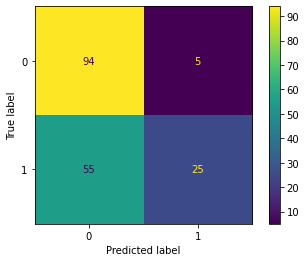

In [73]:
plot_confusion_matrix(modelSvm,X_test,y_test);

## 🟣Acuracy

In [74]:
accSvm=accuracy_score(y_test,yPredSvm)
accSvm

0.664804469273743

## 🟣 Precision Score

In [75]:
precisionSvm=precision_score(y_test,yPredSvm)
precisionSvm

0.8333333333333334

## 🟣 Recall score

In [76]:
recalSvm=recall_score(y_test,yPredSvm)
recalSvm

0.3125

## 🟣 F1-score

In [77]:
f1Svm=f1_score(y_test,yPredSvm)
f1Svm

0.45454545454545453

# Step21: Final Model
<hr>
<h1> Hyperparameters
<h4> Choosing the best hyperparameters through GridSearchCV

## 🟣 Fit model with the best hyperparameters

In [78]:
svm=SVC()
param_grid = {'C':[1, 10, 100],
'gamma':[1, 0.1, 0.001],
'kernel':['linear','rbf']}
modelSvmGrid=GridSearchCV(svm,param_grid=param_grid,cv=5)

In [80]:
modelSvmGrid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['linear', 'rbf']})

## 🟣 Predict

In [82]:
yPredSvmGrid=modelSvmGrid.predict(X_test)
yPredSvmGrid

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

## 🟣 Evaluating the Model

### Confusion Matrix

In [83]:
print(confusion_matrix(y_test,yPredSvmGrid))

[[89 10]
 [26 54]]


#### Classification Report

In [84]:
print(classification_report(y_test,yPredSvmGrid))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.84      0.68      0.75        80

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



#### Plot Confusion Matrix

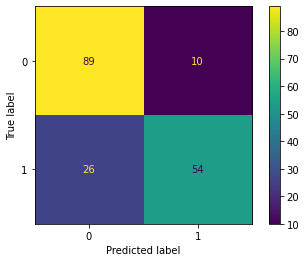

In [85]:
plot_confusion_matrix(modelSvmGrid,X_test,y_test)

### Acuracy

In [86]:
accSvmGrid=accuracy_score(y_test,yPredSvmGrid)
accSvmGrid

0.7988826815642458

### Precision Score

In [87]:
precisionSvmGrid=accuracy_score(y_test,yPredSvmGrid)
precisionSvmGrid

0.7988826815642458

### Recall score

In [88]:
recalSvmGrid=recall_score(y_test,yPredSvmGrid)
recalSvmGrid

0.675

### F1-score

In [89]:
f1SvmGrid=f1_score(y_test,yPredSvmGrid)
f1SvmGrid

0.75

# Step22: Create DataFrame From Accuracy & Precision & Recall & F1-score(Final Model)

In [90]:
dfMetricsSvmFinal=pd.DataFrame([accSvmGrid, precisionSvmGrid, recalSvmGrid,f1SvmGrid], 
index=['Accuracy', 'Precision', 'Recall','F1-score'], 
columns=['SVM Metrics'])
dfMetricsSvmFinal   

,SVM Metrics
Accuracy,0.798883
Precision,0.798883
Recall,0.675000
F1-score,0.750000


# Step23: Create DataFrame From Accuracy & Precision & Recall & F1-score
<hr>
<h3>Concanate All Models dataframes (Step10, Step17, Step22)

In [93]:
dfMetricFinal=pd.concat([dfMetricsLog,dfMetricsKnnFinal,dfMetricsSvmFinal],axis=1,ignore_index=False)
dfMetricFinal

,Logestic Metrics,KNN Metrics,SVM Metrics
Accuracy,0.815642,0.804469,0.798883
Precision,0.840580,0.894737,0.798883
Recall,0.725000,0.637500,0.675000
F1-score,0.778523,0.744526,0.750000


## Best Wishes!, Filoger
<br>
<br>
<br>